<a href="https://www.kaggle.com/code/lalit7881/social-media-user-activity-analysis-99-90-acc?scriptVersionId=295840793" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-media-user-activity-dataset/instagram_usage_lifestyle.csv


## Social Media User Activity Analysis

## Description:
This project explores patterns of user behavior across social media platforms by analyzing a comprehensive user activity dataset. The data captures key aspects of engagement such as posting frequency, likes, comments, shares, session duration, and activity timelines. By examining how users interact with content over time, the analysis highlights trends in engagement intensity, peak usage periods, and differences in behavior across user segments.

The study aims to uncover actionable insights that can help platforms, marketers, and content creators understand audience preferences and optimize content strategies. Through descriptive analytics and data-driven exploration, the project provides a clear view of how user activity evolves, which features drive higher engagement, and how social media usage varies across demographics and platforms.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/social-media-user-activity-dataset/instagram_usage_lifestyle.csv")

In [3]:
df.head()

,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,...,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
0,1,Instagram,51,Female,India,Rural,High,Retired,Bachelor’s,Single,...,2025-11-02,5.0,Mixed,Tech,Private,Yes,No,0,Free,7.83
1,2,Instagram,64,Female,United Kingdom,Urban,Middle,Full-time employed,Other,Divorced,...,2025-03-22,14.8,Photos,Fashion,Public,No,No,3,Free,1.43
2,3,Instagram,41,Female,Canada,Urban,Middle,Student,Bachelor’s,In a relationship,...,2025-08-10,5.0,Mixed,Other,Public,Yes,Yes,1,Free,9.67
3,4,Instagram,27,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,In a relationship,...,2025-03-31,25.9,Stories,Tech,Private,No,No,1,Free,0.94
4,5,Instagram,55,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,Single,...,2025-03-19,13.1,Videos,Food,Public,Yes,No,0,Free,1.03


In [4]:
df.tail()

,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,...,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
1547891,1547892,Instagram,61,Female,United States,Suburban,High,Full-time employed,Master’s,Widowed,...,2025-01-14,15.8,Videos,Other,Friends only,Yes,Yes,4,Free,0.97
1547892,1547893,Instagram,42,Male,United States,Urban,Lower-middle,Full-time employed,Master’s,Divorced,...,2025-08-04,38.0,Photos,Art,Private,No,No,1,Premium,1.32
1547893,1547894,Instagram,32,Male,Canada,Urban,Low,Full-time employed,Master’s,Single,...,2025-04-10,31.8,Live,Other,Private,Yes,Yes,5,Free,1.01
1547894,1547895,Instagram,14,Female,Other,Urban,Low,Student,Bachelor’s,Single,...,2025-03-21,23.6,Live,Tech,Private,Yes,No,3,Free,1.11
1547895,1547896,Instagram,22,Female,Japan,Urban,Lower-middle,Full-time employed,PhD,Single,...,2025-06-15,28.5,Reels,Music,Friends only,Yes,Yes,2,Free,2.07


In [5]:
df.describe()

,user_id,age,exercise_hours_per_week,sleep_hours_per_night,perceived_stress_score,self_reported_happiness,body_mass_index,blood_pressure_systolic,blood_pressure_diastolic,daily_steps_count,...,time_on_explore_per_day,time_on_messages_per_day,time_on_reels_per_day,followers_count,following_count,notification_response_rate,account_creation_year,average_session_length_minutes,linked_accounts_count,user_engagement_score
count,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,...,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06
mean,7.739485e+05,3.898544e+01,7.143480e+00,6.999384e+00,1.998774e+01,5.499804e+00,2.500084e+01,1.244917e+02,7.950007e+01,8.000105e+03,...,3.762037e+01,3.295203e+01,5.647662e+01,2.160543e+03,2.604942e+03,5.002404e-01,2.017501e+03,2.050971e+01,1.975254e+00,1.644642e+00
std,4.468392e+05,1.529453e+01,3.994556e+00,1.097098e+00,1.183258e+01,2.871232e+00,3.976188e+00,2.020699e+01,1.154874e+01,8.939761e+01,...,2.535788e+01,2.144569e+01,3.534782e+01,3.402016e+03,2.751922e+03,2.887827e-01,4.611735e+00,8.697454e+00,1.352058e+00,1.812684e+00
min,1.000000e+00,1.300000e+01,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01,9.000000e+01,6.000000e+01,7.566000e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,2.000000e+01,0.000000e+00,2.010000e+03,5.000000e+00,0.000000e+00,6.700000e-01
25%,3.869748e+05,2.600000e+01,4.000000e+00,6.300000e+00,1.000000e+01,3.000000e+00,2.230000e+01,1.070000e+02,7.000000e+01,7.940000e+03,...,1.800000e+01,1.600000e+01,2.900000e+01,5.430000e+02,6.630000e+02,2.500000e-01,2.013000e+03,1.330000e+01,1.000000e+00,1.000000e+00
50%,7.739485e+05,3.900000e+01,6.600000e+00,7.000000e+00,2.000000e+01,5.000000e+00,2.500000e+01,1.240000e+02,7.900000e+01,8.000000e+03,...,3.400000e+01,3.100000e+01,5.400000e+01,1.154000e+03,1.519000e+03,5.000000e-01,2.017000e+03,2.040000e+01,2.000000e+00,1.100000e+00
75%,1.160922e+06,5.200000e+01,9.700000e+00,7.700000e+00,3.000000e+01,8.000000e+00,2.770000e+01,1.420000e+02,9.000000e+01,8.060000e+03,...,5.300000e+01,4.700000e+01,8.000000e+01,2.459000e+03,3.451000e+03,7.500000e-01,2.022000e+03,2.760000e+01,3.000000e+00,1.290000e+00
max,1.547896e+06,6.500000e+01,2.410000e+01,1.000000e+01,4.000000e+01,1.000000e+01,4.500000e+01,1.590000e+02,9.900000e+01,8.473000e+03,...,1.710000e+02,1.380000e+02,2.220000e+02,2.088110e+05,1.000000e+04,1.000000e+00,2.025000e+03,5.200000e+01,5.000000e+00,1.867000e+01


In [6]:
df.isnull().sum()

user_id                           0
app_name                          0
age                               0
gender                            0
country                           0
urban_rural                       0
income_level                      0
employment_status                 0
education_level                   0
relationship_status               0
has_children                      0
exercise_hours_per_week           0
sleep_hours_per_night             0
diet_quality                      0
smoking                           0
alcohol_frequency                 0
perceived_stress_score            0
self_reported_happiness           0
body_mass_index                   0
blood_pressure_systolic           0
blood_pressure_diastolic          0
daily_steps_count                 0
weekly_work_hours                 0
hobbies_count                     0
social_events_per_month           0
books_read_per_year               0
volunteer_hours_per_month         0
travel_frequency_per_year   

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(1547896, 58)

In [9]:
df.dtypes

user_id                             int64
app_name                           object
age                                 int64
gender                             object
country                            object
urban_rural                        object
income_level                       object
employment_status                  object
education_level                    object
relationship_status                object
has_children                       object
exercise_hours_per_week           float64
sleep_hours_per_night             float64
diet_quality                       object
smoking                            object
alcohol_frequency                  object
perceived_stress_score              int64
self_reported_happiness             int64
body_mass_index                   float64
blood_pressure_systolic             int64
blood_pressure_diastolic            int64
daily_steps_count                   int64
weekly_work_hours                 float64
hobbies_count                     

In [10]:
df.nunique()

user_id                           1547896
app_name                                1
age                                    53
gender                                  4
country                                10
urban_rural                             3
income_level                            5
employment_status                       6
education_level                         6
relationship_status                     5
has_children                            2
exercise_hours_per_week               241
sleep_hours_per_night                  71
diet_quality                            5
smoking                                 3
alcohol_frequency                       5
perceived_stress_score                 41
self_reported_happiness                10
body_mass_index                       286
blood_pressure_systolic                70
blood_pressure_diastolic               40
daily_steps_count                     773
weekly_work_hours                     800
hobbies_count                     

In [11]:
df.columns

Index(['user_id', 'app_name', 'age', 'gender', 'country', 'urban_rural',
       'income_level', 'employment_status', 'education_level',
       'relationship_status', 'has_children', 'exercise_hours_per_week',
       'sleep_hours_per_night', 'diet_quality', 'smoking', 'alcohol_frequency',
       'perceived_stress_score', 'self_reported_happiness', 'body_mass_index',
       'blood_pressure_systolic', 'blood_pressure_diastolic',
       'daily_steps_count', 'weekly_work_hours', 'hobbies_count',
       'social_events_per_month', 'books_read_per_year',
       'volunteer_hours_per_month', 'travel_frequency_per_year',
       'daily_active_minutes_instagram', 'sessions_per_day',
       'posts_created_per_week', 'reels_watched_per_day',
       'stories_viewed_per_day', 'likes_given_per_day',
       'comments_written_per_day', 'dms_sent_per_week',
       'dms_received_per_week', 'ads_viewed_per_day', 'ads_clicked_per_day',
       'time_on_feed_per_day', 'time_on_explore_per_day',
       'time_on_

## Data visualizations

In [12]:
df['last_login_date'] = pd.to_datetime(df['last_login_date'])

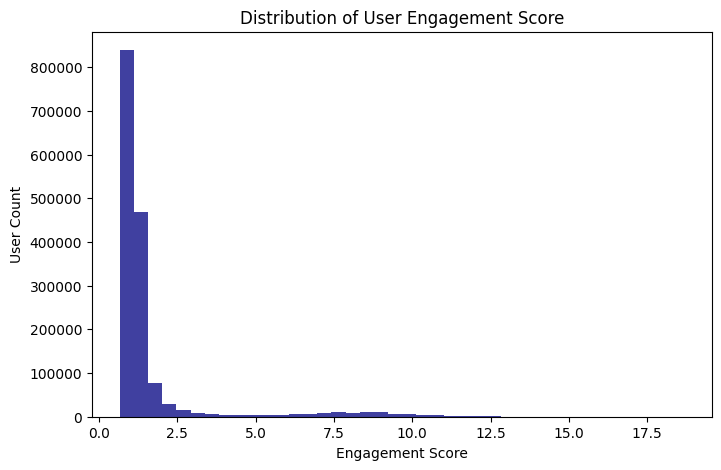

In [13]:
plt.figure(figsize=(8,5))
plt.hist(df['user_engagement_score'], bins=40, color='navy', alpha=0.75)

plt.title("Distribution of User Engagement Score")
plt.xlabel("Engagement Score")
plt.ylabel("User Count")
plt.show()


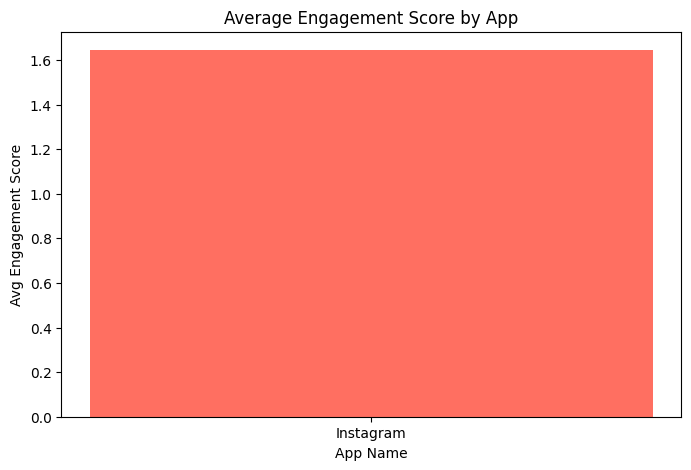

In [14]:
app_engagement = df.groupby('app_name')['user_engagement_score'].mean()

plt.figure(figsize=(8,5))
plt.bar(app_engagement.index, app_engagement.values,
        color=['#ff6f61', '#6b5b95', '#88b04b'])

plt.title("Average Engagement Score by App")
plt.xlabel("App Name")
plt.ylabel("Avg Engagement Score")
plt.show()


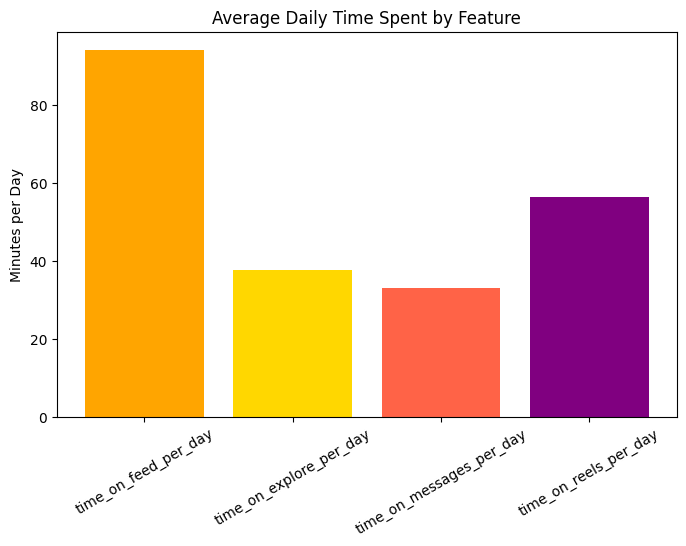

In [15]:
time_cols = [
    'time_on_feed_per_day',
    'time_on_explore_per_day',
    'time_on_messages_per_day',
    'time_on_reels_per_day'
]

time_mean = df[time_cols].mean()

plt.figure(figsize=(8,5))
plt.bar(time_mean.index, time_mean.values,
        color=['orange', 'gold', 'tomato', 'purple'])

plt.title("Average Daily Time Spent by Feature")
plt.ylabel("Minutes per Day")
plt.xticks(rotation=30)
plt.show()


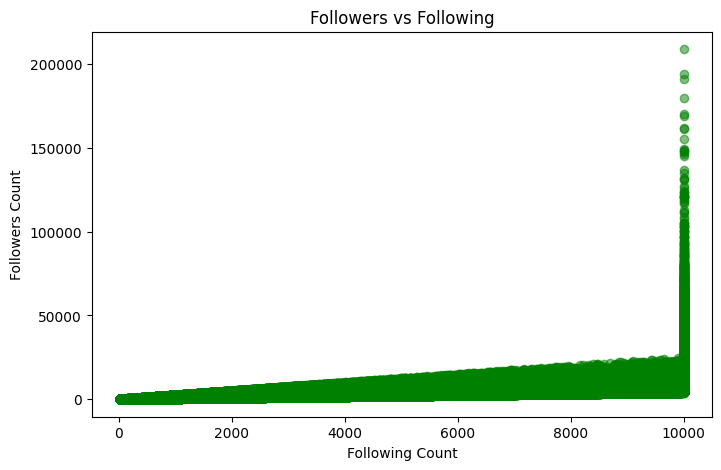

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(df['following_count'], df['followers_count'],
            color='green', alpha=0.5)

plt.title("Followers vs Following")
plt.xlabel("Following Count")
plt.ylabel("Followers Count")
plt.show()


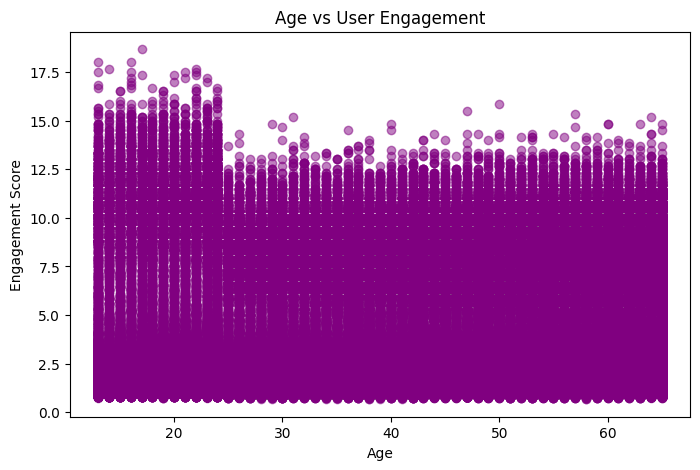

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(df['age'], df['user_engagement_score'],
            color='purple', alpha=0.5)

plt.title("Age vs User Engagement")
plt.xlabel("Age")
plt.ylabel("Engagement Score")
plt.show()


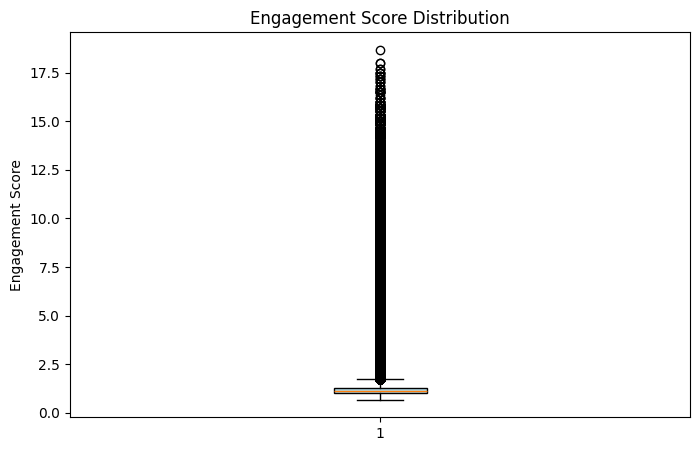

In [18]:
plt.figure(figsize=(8,5))
plt.boxplot(df['user_engagement_score'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'))

plt.title("Engagement Score Distribution")
plt.ylabel("Engagement Score")
plt.show()


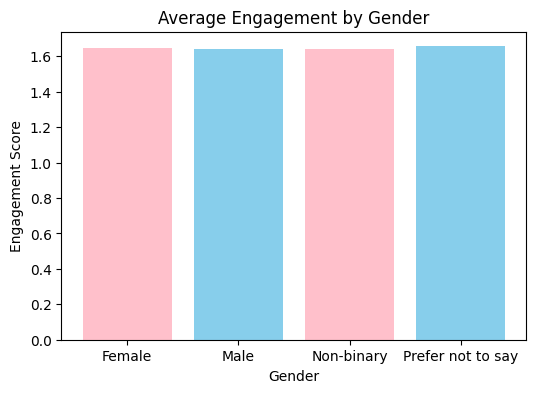

In [19]:
gender_engagement = df.groupby('gender')['user_engagement_score'].mean()

plt.figure(figsize=(6,4))
plt.bar(gender_engagement.index, gender_engagement.values,
        color=['pink', 'skyblue'])

plt.title("Average Engagement by Gender")
plt.xlabel("Gender")
plt.ylabel("Engagement Score")
plt.show()


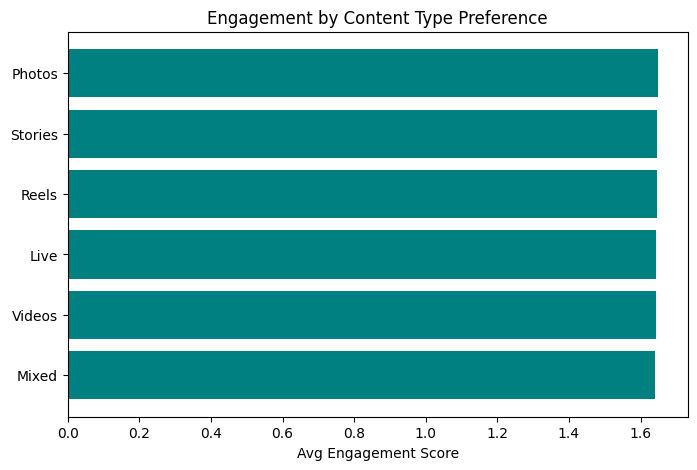

In [20]:
content_eng = (
    df.groupby('content_type_preference')['user_engagement_score']
    .mean()
    .sort_values()
)

plt.figure(figsize=(8,5))
plt.barh(content_eng.index, content_eng.values, color='teal')

plt.title("Engagement by Content Type Preference")
plt.xlabel("Avg Engagement Score")
plt.show()


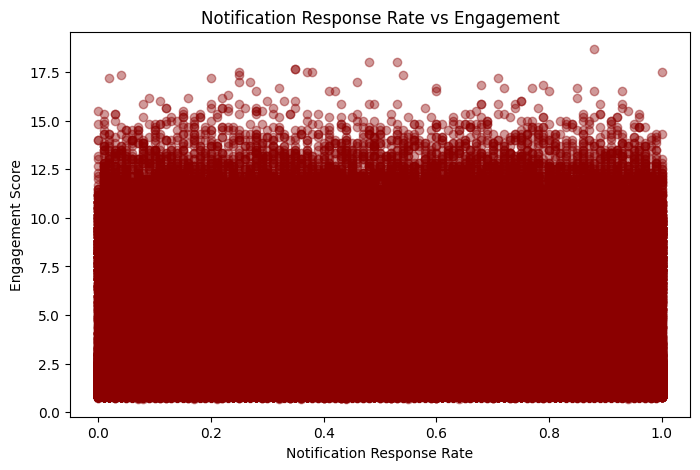

In [21]:
plt.figure(figsize=(8,5))
plt.plot(df['notification_response_rate'],
         df['user_engagement_score'],
         'o', color='darkred', alpha=0.4)

plt.title("Notification Response Rate vs Engagement")
plt.xlabel("Notification Response Rate")
plt.ylabel("Engagement Score")
plt.show()


## Feature engg

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [23]:
if 'last_login_date' in df.columns:
    df['last_login_date'] = pd.to_datetime(df['last_login_date'], errors='coerce')
    df['last_login_year'] = df['last_login_date'].dt.year
    df['last_login_month'] = df['last_login_date'].dt.month
    df.drop(columns=['last_login_date'], inplace=True)


In [24]:
df['engagement_class'] = np.where(
    df['user_engagement_score'] >= df['user_engagement_score'].median(),
    1, 0
)

In [25]:
yes_no_cols = [
    'has_children',
    'uses_premium_features',
    'two_factor_auth_enabled',
    'biometric_login_used'
]

for col in yes_no_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})


In [26]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col], _ = pd.factorize(df[col])


In [27]:
X = df.drop(columns=[
    'user_id',
    'user_engagement_score',
    'engagement_class'
])

y = df['engagement_class']


In [28]:
print("Non-numeric columns left:", X.select_dtypes(include='object').columns)


Non-numeric columns left: Index([], dtype='object')


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1),
    "Naive Bayes": GaussianNB()
}

accuracy_scores = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy_scores[name] = accuracy_score(y_test, y_pred) * 100
    predictions[name] = y_pred

    print(f"{name} Accuracy: {accuracy_scores[name]:.2f}%")

Logistic Regression Accuracy: 99.90%
Decision Tree Accuracy: 96.33%
Random Forest Accuracy: 93.56%
Naive Bayes Accuracy: 78.82%


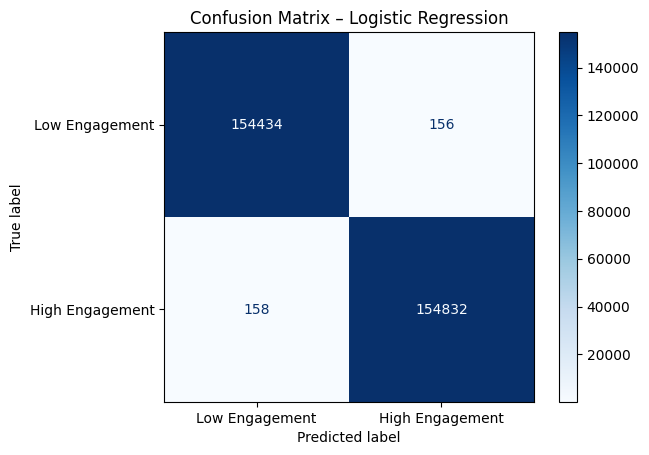

In [32]:
best_model = max(accuracy_scores, key=accuracy_scores.get)
best_pred = predictions[best_model]

cm = confusion_matrix(y_test, best_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Low Engagement", "High Engagement"]
)

disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix – {best_model}")
plt.show()

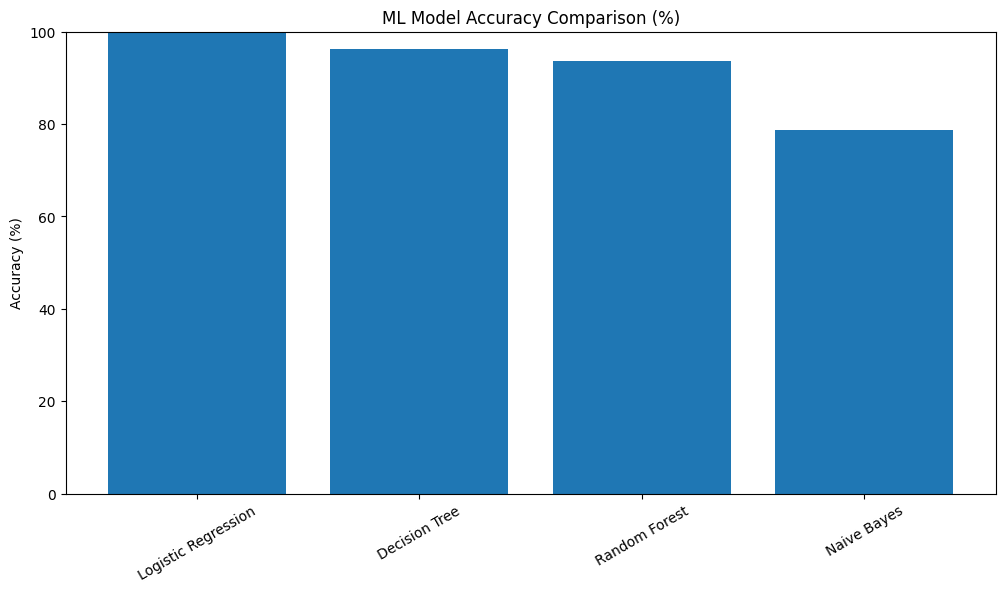

In [33]:
plt.figure(figsize=(12,6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.title("ML Model Accuracy Comparison (%)")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.xticks(rotation=30)
plt.show()


## Thank you..pls upvote!!!!!!